In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import os
import matplotlib.pyplot as plt



In [2]:
# #Set environment variable to avoid memory leak
# os.environ["OMP_NUM_THREADS"] = "1"

# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [5]:
# Display the columns in the DataFrame
df_market_data.columns



Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')

In [6]:
df_market_data.dtypes

price_change_percentage_24h     float64
price_change_percentage_7d      float64
price_change_percentage_14d     float64
price_change_percentage_30d     float64
price_change_percentage_60d     float64
price_change_percentage_200d    float64
price_change_percentage_1y      float64
dtype: object

In [7]:
# Ensure there are no missing values
print("Missing values in each column:\n", df_market_data.isnull().sum())

Missing values in each column:
 price_change_percentage_24h     0
price_change_percentage_7d      0
price_change_percentage_14d     0
price_change_percentage_30d     0
price_change_percentage_60d     0
price_change_percentage_200d    0
price_change_percentage_1y      0
dtype: int64


In [8]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
# Reset the index to make 'coin_id' a column instead of an index
df_market_data.reset_index(inplace=True)

# Verify the columns and first few rows of the DataFrame
print("Column names in the DataFrame:", df_market_data.columns)

# Initialize the StandardScaler
scaler = StandardScaler()

# Select the columns to be scaled (exclude the 'coin_id' column)
columns_to_scale = df_market_data.columns.difference(['coin_id'])

# Fit and transform the data using StandardScaler
scaled_data = scaler.fit_transform(df_market_data[columns_to_scale])



Column names in the DataFrame: Index(['coin_id', 'price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')


In [9]:
# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale)

# Copy the crypto names from the original data
scaled_df['coin_id'] = df_market_data['coin_id']

# Set the 'coin_id' column as the index
scaled_df.set_index('coin_id', inplace=True)

# Display sample data
scaled_df.head()


,price_change_percentage_14d,price_change_percentage_1y,price_change_percentage_200d,price_change_percentage_24h,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_7d
coin_id,,,,,,,
bitcoin,0.772200,-0.251637,-0.355953,0.508529,0.235460,-0.067495,0.493193
ethereum,0.558692,-0.199352,-0.115759,0.185446,-0.054341,-0.273483,0.934445
tether,-0.021680,-0.282061,-0.550247,0.021774,-0.061030,0.008005,-0.706337
ripple,0.249458,-0.295546,-0.458259,-0.040764,-0.050388,-0.373164,-0.810928
bitcoin-cash,1.760610,-0.270317,-0.499848,1.193036,0.545842,-0.291203,2.000959


---

### Find the Best Value for k Using the Original Data.

In [10]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

# Display the list of k-values
print(k_values)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [11]:
# Create an empty list to store the inertia values

inertia = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1)
    
    # 2. Fit the model to the data using scaled_df
    kmeans.fit(scaled_df)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia.append(kmeans.inertia_)




C:\Users\reach\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\reach\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\reach\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\reach\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is k

In [12]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": k_values,
    "inertia": inertia
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)


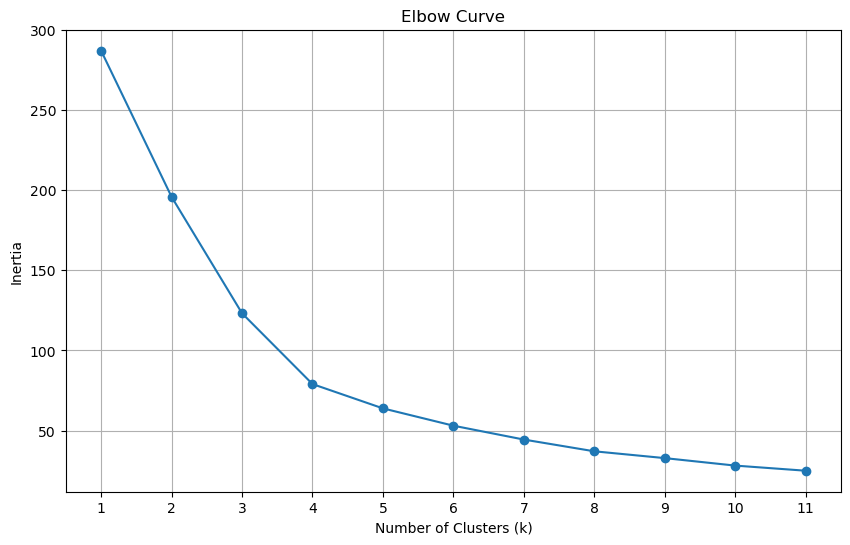

In [13]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(elbow_df["k"], elbow_df["inertia"], marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Curve")
plt.xticks(k_values)  # Ensure all k-values are shown on the x-axis
plt.grid(True)
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:**  4

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [14]:
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=4, n_init=10, random_state=1)


In [15]:
# Fit the K-Means model using the scaled data
kmeans.fit(scaled_df)
print(kmeans.cluster_centers_)


C:\Users\reach\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[[-0.4827023  -0.18203893 -0.18795807  0.03258562 -0.25453208 -0.07913767
  -0.56998841]
 [ 2.90705393  1.34848839  3.14887546  1.04553034  5.35145461  4.76991278
  -0.61832816]
 [ 0.83462785 -0.20800783 -0.22264199  0.23756041  0.19065425 -0.212313
   1.19101578]
 [-1.20695612  6.08862545  4.63238025 -4.98104189 -1.21212587  0.04773554
  -0.04517829]]


In [16]:
# Predict the clusters to group the cryptocurrencies using the scaled 
cluster_labels = kmeans.predict(scaled_df)



# Print the resulting array of cluster values.
print(kmeans.cluster_centers_)


[[-0.4827023  -0.18203893 -0.18795807  0.03258562 -0.25453208 -0.07913767
  -0.56998841]
 [ 2.90705393  1.34848839  3.14887546  1.04553034  5.35145461  4.76991278
  -0.61832816]
 [ 0.83462785 -0.20800783 -0.22264199  0.23756041  0.19065425 -0.212313
   1.19101578]
 [-1.20695612  6.08862545  4.63238025 -4.98104189 -1.21212587  0.04773554
  -0.04517829]]


In [17]:
# Create a copy of the DataFrame
scaled_df_copy = scaled_df.copy()


In [18]:
# Add a new column to the DataFrame with the predicted clusters
scaled_df['Cluster'] = cluster_labels


# Display sample data
print(scaled_df.head())

              price_change_percentage_14d  price_change_percentage_1y  \
coin_id                                                                 
bitcoin                          0.772200                   -0.251637   
ethereum                         0.558692                   -0.199352   
tether                          -0.021680                   -0.282061   
ripple                           0.249458                   -0.295546   
bitcoin-cash                     1.760610                   -0.270317   

              price_change_percentage_200d  price_change_percentage_24h  \
coin_id                                                                   
bitcoin                          -0.355953                     0.508529   
ethereum                         -0.115759                     0.185446   
tether                           -0.550247                     0.021774   
ripple                           -0.458259                    -0.040764   
bitcoin-cash                     -0.49

In [36]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

scatter_plot = scaled_df_copy.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="Cluster",
    hover_cols=["coin_id"],
    title="Cryptocurrency Clustering",
    xlabel="24h Price Change (%)",
    ylabel="7d Price Change (%)"
)

# Show the plot
scatter_plot


:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,Cluster)

---

### Optimize Clusters with Principal Component Analysis.

In [21]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)


In [22]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca_data = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'])

# View the first five rows of the DataFrame. 
print(pca_df.head())

        PC1       PC2       PC3
0  0.448908 -1.245376 -0.850640
1  0.495367 -0.899823 -1.317559
2 -0.818846  0.071899  0.695015
3 -0.840357  0.080054  0.544360
4  0.813240 -2.669520 -1.643321


In [23]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
# Retrieve the explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Calculate the total explained variance
total_explained_variance = explained_variance.sum()

# Display the explained variance ratio and the total explained variance
print("Explained Variance Ratio for each Principal Component:")
for i, variance in enumerate(explained_variance, start=1):
    print(f"PC{i}: {variance:.4f}")

print(f"\nTotal Explained Variance: {total_explained_variance:.4f}")


Explained Variance Ratio for each Principal Component:
PC1: 0.3487
PC2: 0.3136
PC3: 0.2263

Total Explained Variance: 0.8886


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.8886

In [24]:
# Create a new DataFrame with the PCA data.
pca = PCA(n_components=3)
pca_data = pca.fit_transform(scaled_df)
# Creating a DataFrame with the PCA data
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'])

# Copy the crypto names from the original data

pca_df['coin_id'] = scaled_df.index

# Set the coinid column as index

pca_df.set_index('coin_id', inplace=True)

# Display sample data
print(pca_df.head())

                   PC1       PC2       PC3
coin_id                                   
bitcoin       0.448908 -1.245376 -0.850640
ethereum      0.495367 -0.899823 -1.317559
tether       -0.818846  0.071899  0.695015
ripple       -0.840357  0.080054  0.544360
bitcoin-cash  0.813240 -2.669520 -1.643321


---

### Find the Best Value for k Using the PCA Data

In [25]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))


In [26]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
for k in range(1, 12):
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=1)
    
    # 2. Fit the model to the data using the PCA data
    kmeans.fit(pca_df)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia.append(kmeans.inertia_)

# Display the inertia values
print(inertia)


C:\Users\reach\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\reach\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\reach\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\reach\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak

[290.6226939879642, 203.5797257883008, 112.85484605815624, 44.13060225321714, 33.2174272551524, 23.37167668829721, 17.172200123597403, 13.593410892098152, 11.155098209251488, 8.958913480156959, 7.345260405169615]


In [27]:
# Create a dictionary with the data to plot the Elbow curve

elbow_data = {
    "k": list(range(1, 12)),
    "inertia": inertia
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)



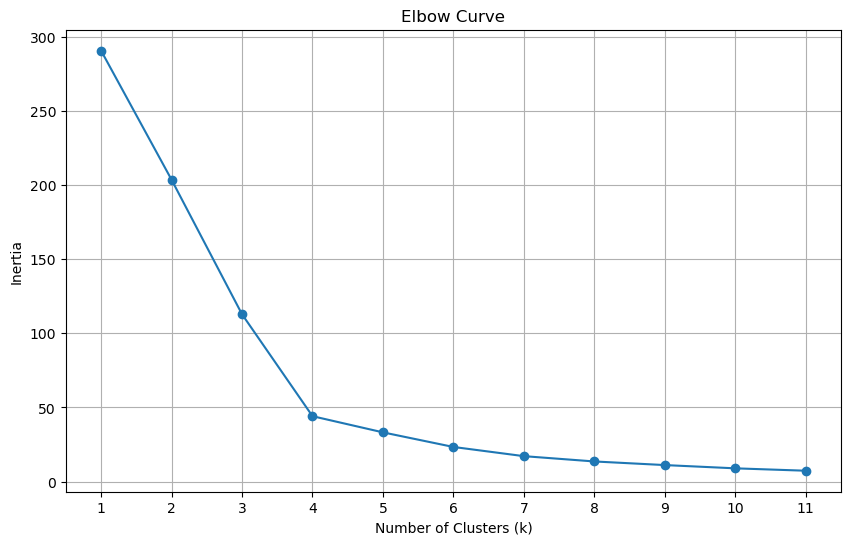

In [28]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(elbow_df["k"], elbow_df["inertia"], marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Curve")
plt.xticks(list(range(1, 12)))  # Ensure all k-values are shown on the x-axis
plt.grid(True)
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [29]:
# Initialize the K-Means model using the best value for k
best_k = 4  # Replace with the actual best k value you determined from the Elbow curve
kmeans = KMeans(n_clusters=best_k, random_state=1)


In [30]:
# Fit the K-Means model using the PCA data
kmeans.fit(pca_df)


C:\Users\reach\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\reach\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=1)

In [31]:
# Predict the clusters to group the cryptocurrencies using the PCA data
cluster_labels = kmeans.predict(pca_df)

# Print the resulting array of cluster values
print(cluster_labels)



[1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 3 1 0 0 2
 0 0 0 0]


In [32]:
# Create a copy of the DataFrame with the PCA data
pca_df_copy = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_df_copy['Cluster'] = cluster_labels

# Display sample data
pca_df_copy.head()

,PC1,PC2,PC3,Cluster
coin_id,,,,
bitcoin,0.448908,-1.245376,-0.850640,1
ethereum,0.495367,-0.899823,-1.317559,1
tether,-0.818846,0.071899,0.695015,0
ripple,-0.840357,0.080054,0.544360,0
bitcoin-cash,0.813240,-2.669520,-1.643321,1


In [33]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
scatter_plot = pca_df_copy.hvplot.scatter(
    x= 'PC1', 
    y= 'PC2', 
    c= 'Cluster',
    hover_cols=['coin_id'],
    title='Cyptocurrency Clustering based on PCA',
    xlabel= 'Pricipal Compnent 1',
    ylabel= 'Pricipal Component 2',
    colormap = 'Category10'
)

# Display the plot
scatter_plot


:Scatter   [PC1]   (PC2,Cluster,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [34]:
# Composite plot to contrast the Elbow curves
# Initialize the StandardScaler
scaler = StandardScaler()

# Select the columns to be scaled (exclude the 'coin_id' column)
columns_to_scale = df_market_data.columns.difference(['coin_id'])

# Fit and transform the data
scaled_data = scaler.fit_transform(df_market_data[columns_to_scale])

# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale)

# Create Elbow curve for original data
inertia_original = []
for k in range(1, 12):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(scaled_df)
    inertia_original.append(kmeans.inertia_)

elbow_df_original = pd.DataFrame({
    "k": list(range(1, 12)),
    "inertia": inertia_original
})

elbow_curve_original = elbow_df_original.hvplot.line(
    x='k',
    y='inertia',
    title='Elbow Curves Comparison',
    xlabel='Number of Clusters (k)',
    ylabel='Inertia',
    color='blue',
    label='Original Data'
)

# Perform PCA
pca = PCA(n_components=3)
pca_data = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'])

# Create Elbow curve for PCA data
inertia_pca = []
for k in range(1, 12):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(pca_df)
    inertia_pca.append(kmeans.inertia_)

elbow_df_pca = pd.DataFrame({
    "k": list(range(1, 12)),
    "inertia": inertia_pca
})

elbow_curve_pca = elbow_df_pca.hvplot.line(
    x='k',
    y='inertia',
    color='red',
    label='PCA Data'
)

# Combine the Elbow curves into a composite plot
composite_elbow_curve = elbow_curve_original * elbow_curve_pca

# Display the composite Elbow curve plot
composite_elbow_curve


C:\Users\reach\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\reach\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\reach\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\reach\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak

:Overlay
   .Curve.Original_Data :Curve   [k]   (inertia)
   .Curve.PCA_Data      :Curve   [k]   (inertia)

In [35]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!
# Composite plot to contrast the clusters
# YOUR CODE HERE!
# Create KMeans model with the best k (assuming k=4)
best_k = 4
kmeans_original = KMeans(n_clusters=best_k, random_state=1)
kmeans_pca = KMeans(n_clusters=best_k, random_state=1)

# Fit the KMeans model to the original scaled data
kmeans_original.fit(scaled_df)
cluster_labels_original = kmeans_original.predict(scaled_df)

# Fit the KMeans model to the PCA-transformed data
kmeans_pca.fit(pca_df)
cluster_labels_pca = kmeans_pca.predict(pca_df)

# Create DataFrame copies to add cluster labels
scaled_df_copy = scaled_df.copy()
pca_df_copy = pca_df.copy()

scaled_df_copy['Cluster'] = cluster_labels_original
pca_df_copy['Cluster'] = cluster_labels_pca

# Create scatter plots for original and PCA data
scatter_plot_original = scaled_df_copy.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    c='Cluster',
    hover_cols=['coin_id'],
    title='Clusters based on Original Data',
    xlabel='24h Price Change (%)',
    ylabel='7d Price Change (%)',
    colormap='Category10'
)

scatter_plot_pca = pca_df_copy.hvplot.scatter(
    x='PC1',
    y='PC2',
    c='Cluster',
    hover_cols=['coin_id'],
    title='Clusters based on PCA Data',
    xlabel='Principal Component 1',
    ylabel='Principal Component 2',
    colormap='Category10'
)

# Combine the scatter plots into a composite plot
composite_scatter_plot = scatter_plot_original + scatter_plot_pca

# Display the composite scatter plot
composite_scatter_plot


C:\Users\reach\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\reach\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\reach\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\reach\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak

:Layout
   .Scatter.I  :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,Cluster)
   .Scatter.II :Scatter   [PC1]   (PC2,Cluster)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** I can see that the impact it created that the data is well compacted and most of not far away from the mean of the cluster